**Aluno:** Rafael de Souza Conceição

**Matéria:**Reconhecimento de Padrões - Francisco de Assis Boldt

Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;
Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;
Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;
Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.
Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

#### Baixar dataset do kaggle

In [1]:
!pip install kaggle

**Enviar as credencias do Kaggle**

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


**Baixar dataset**

In [41]:
!kaggle datasets download "uciml/red-wine-quality-cortez-et-al-2009"

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 22.8MB/s]


In [42]:
!unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [90]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [86]:
#le = LabelEncoder()
#df = df.apply(le.fit_transform)
#df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,2
1,31,112,0,22,61,25,61,271,32,30,17,2
2,31,88,4,17,55,15,48,287,38,27,17,2
3,65,12,56,10,38,17,54,354,28,20,17,3
4,27,76,0,10,39,11,28,342,63,18,11,2


In [91]:
X = df.iloc[:,0:11] 
y = df.iloc[:,-1]

In [88]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,27,76,0,10,39,11,28,342,63,18,11
1,31,112,0,22,61,25,61,271,32,30,17
2,31,88,4,17,55,15,48,287,38,27,17
3,65,12,56,10,38,17,54,354,28,20,17
4,27,76,0,10,39,11,28,342,63,18,11
...,...,...,...,...,...,...,...,...,...,...,...
1594,15,56,8,11,53,32,38,119,57,20,26
1595,12,47,10,15,25,40,45,135,64,38,36
1596,16,42,13,17,39,29,34,185,54,37,33
1597,12,65,12,11,38,32,38,164,69,33,23


In [92]:
modelo = LogisticRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))

0.5384615384615384


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [93]:
mse = mean_squared_error(y, ypred) 
print(f"MSE {mse}")

MSE 0.5384615384615384


In [94]:
modelo.intercept_

array([-0.00389798,  0.02815952,  0.51036845, -0.09017999, -0.38432809,
       -0.06012191])

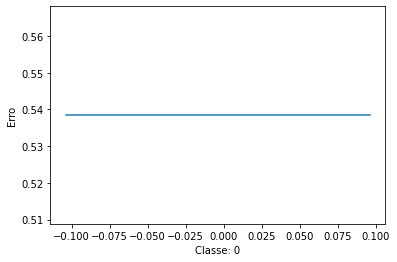

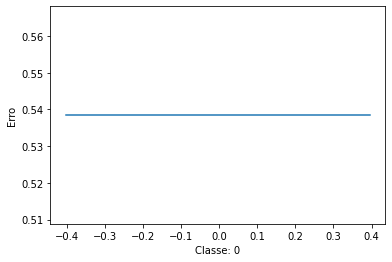

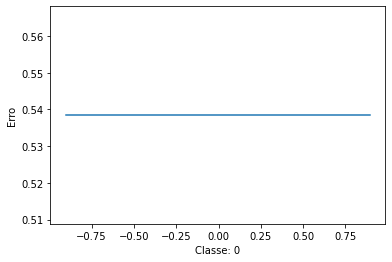

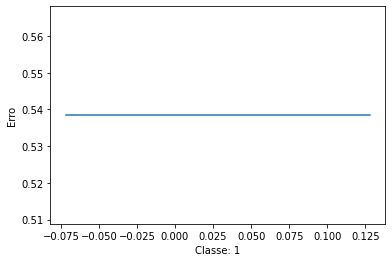

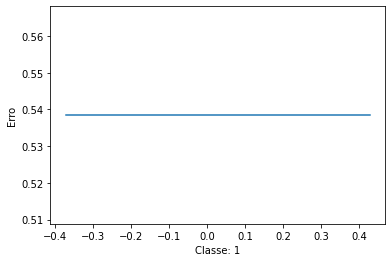

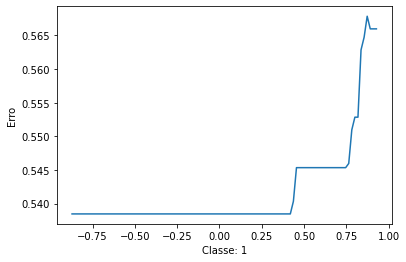

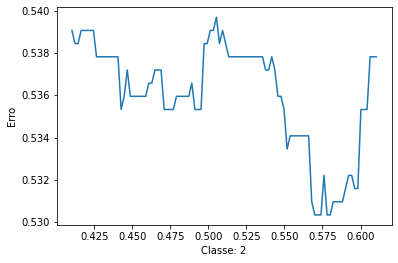

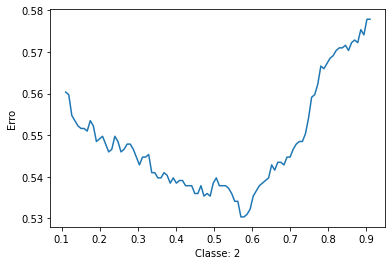

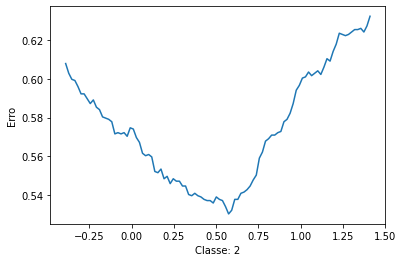

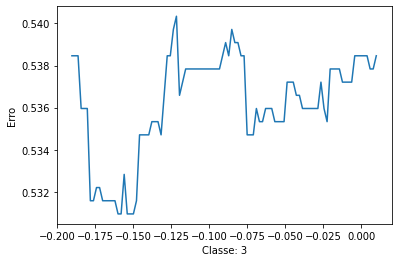

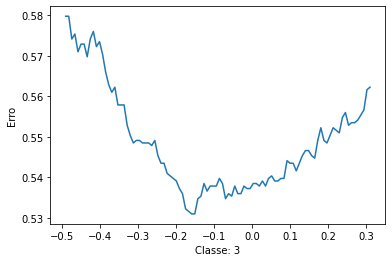

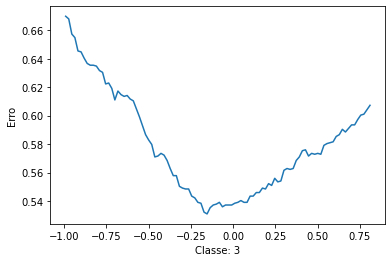

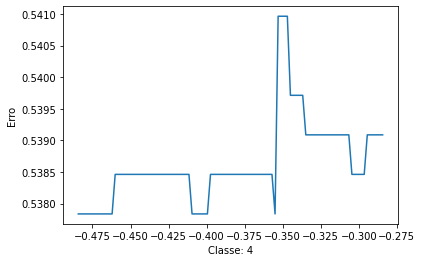

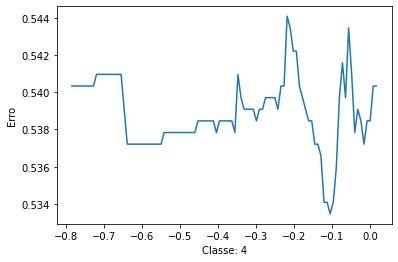

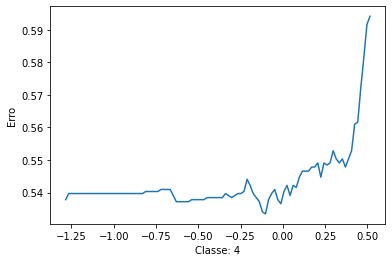

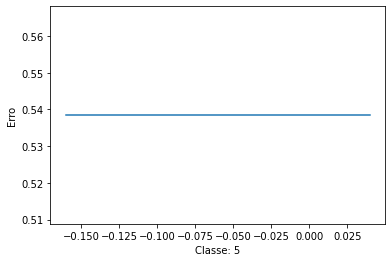

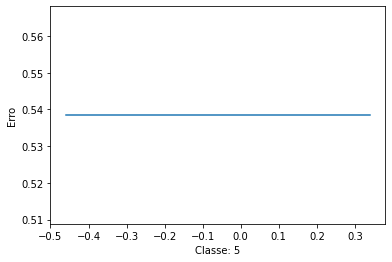

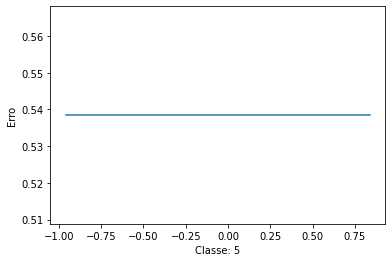

In [95]:
delta = [0.1, 0.4, 0.9]

    
for i in range(len(modelo.intercept_)): 
      for j in range(len(delta)): 
        erros = []
        intercept = modelo.intercept_[i]  
        ws = np.linspace(intercept-delta[j], intercept+delta[j], 100)
        for w in ws:
            modelo.intercept_[i] = w
            ypred = modelo.predict(X)
            erro = mean_squared_error(y, ypred)
            erros.append(erro)    
        modelo.intercept_[i] = intercept
        plt.ylabel("Erro")
        plt.xlabel(f"Classe: {i}")  
        plt.plot(ws,erros)
        plt.show()
